# PCA Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

La siguiente celda elimina la columna ID y remueve los registros que tengan las celdas NA

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.drop('ID', axis=1, inplace=True)
df.dropna(axis = 0, inplace = True) # remove empty values
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


Se crea una función para poder la correlación de las variables del dataframe

In [88]:
def generateCorrPlot(df: pd.DataFrame):
    plt.figure(figsize=[20,10])
    sns.heatmap(df.corr(), annot=True)
    plt.show()

Se visualiza la correlación de todas las variables en el dataframe original

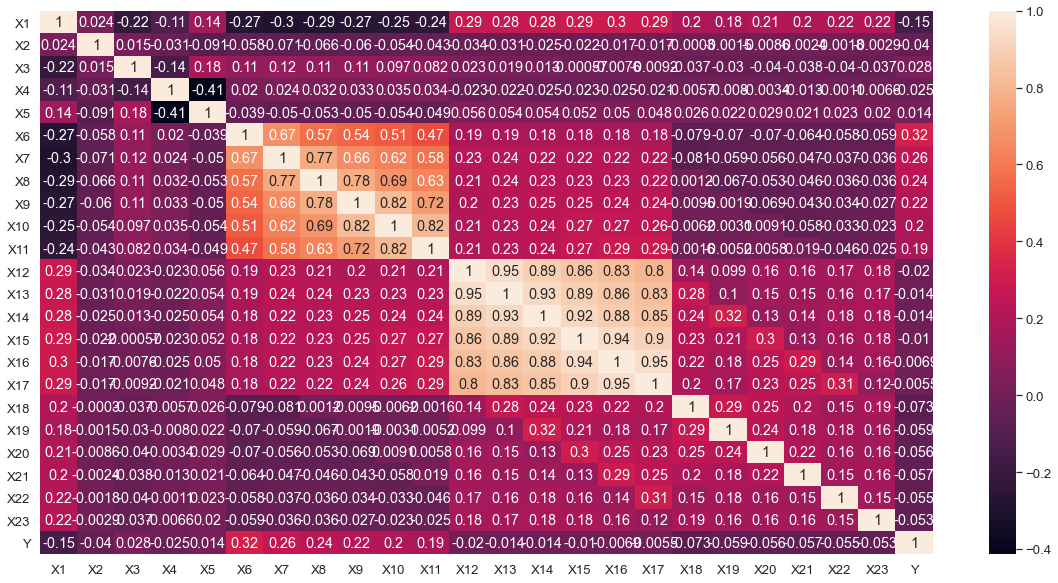

In [89]:
generateCorrPlot(df)

Se defina la función para obtener la varianza total y de cada variable

In [90]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    sum_variance = 0
    for i in data.columns.values.tolist():
        variance = data[i].var()/totalVariance
        sum_variance += variance
        print(f'Varianza {i}: {((variance)*100).round(2)}%, total: {round(sum_variance*100, 2)}%')

Se eliminar las variables categóricas (cat_columns) y la variable cont_columns contiene las columnas que no sean las de cat_columns

In [91]:
cat_columns = ['X2', 'X3', 'X4', 'Y']
cont_columns = [v for v in df.columns.values.tolist() if v not in (cat_columns)]
print(cont_columns)

['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


Se crea un nuevo dataframe con las columnas presentes en cont_columns

In [92]:
df2 = df[cont_columns].copy()
df2.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Se genera un plot para ver la correlación de las variables continuas en el análisis, se considerarán variables con alto coeficiente de correlación

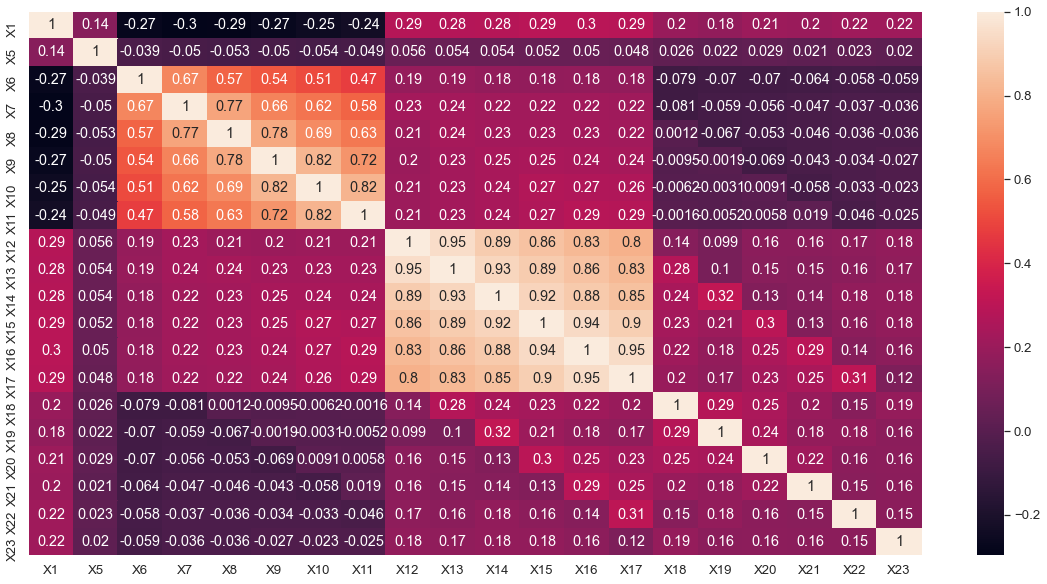

In [93]:
generateCorrPlot(df2)

Se obtiene la varianza de las variables a utilizar, se puede ver que algunas variables tienen una variación muy alta como es el caso de X1, X12 - X17, esto se debe a que los datos son muy grandes por lo que se va a tener que estandarizar el dataframe.

In [94]:
getVarianceInfo(df2)

Total variance 45450192701.38758
Varianza X1: 37.03%, total: 37.03%
Varianza X5: 0.0%, total: 37.03%
Varianza X6: 0.0%, total: 37.03%
Varianza X7: 0.0%, total: 37.03%
Varianza X8: 0.0%, total: 37.03%
Varianza X9: 0.0%, total: 37.03%
Varianza X10: 0.0%, total: 37.03%
Varianza X11: 0.0%, total: 37.03%
Varianza X12: 11.94%, total: 48.98%
Varianza X13: 11.16%, total: 60.13%
Varianza X14: 10.59%, total: 70.73%
Varianza X15: 9.12%, total: 79.84%
Varianza X16: 8.14%, total: 87.98%
Varianza X17: 7.81%, total: 95.79%
Varianza X18: 0.6%, total: 96.4%
Varianza X19: 1.17%, total: 97.57%
Varianza X20: 0.68%, total: 98.25%
Varianza X21: 0.54%, total: 98.79%
Varianza X22: 0.51%, total: 99.3%
Varianza X23: 0.7%, total: 100.0%


Se estandarizan los datos y se crea un nuevo dataframe removiendo la media y volviendo unidad la varianza para que cada variable contribuya de igual manera al análisis.

In [95]:
# Escalando los datos
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
#getVarianceInfo(df3)

In [96]:
getVarianceInfo(df3)

Total variance 20.000667623593394
Varianza X1: 5.0%, total: 5.0%
Varianza X5: 5.0%, total: 10.0%
Varianza X6: 5.0%, total: 15.0%
Varianza X7: 5.0%, total: 20.0%
Varianza X8: 5.0%, total: 25.0%
Varianza X9: 5.0%, total: 30.0%
Varianza X10: 5.0%, total: 35.0%
Varianza X11: 5.0%, total: 40.0%
Varianza X12: 5.0%, total: 45.0%
Varianza X13: 5.0%, total: 50.0%
Varianza X14: 5.0%, total: 55.0%
Varianza X15: 5.0%, total: 60.0%
Varianza X16: 5.0%, total: 65.0%
Varianza X17: 5.0%, total: 70.0%
Varianza X18: 5.0%, total: 75.0%
Varianza X19: 5.0%, total: 80.0%
Varianza X20: 5.0%, total: 85.0%
Varianza X21: 5.0%, total: 90.0%
Varianza X22: 5.0%, total: 95.0%
Varianza X23: 5.0%, total: 100.0%


Se declara el objeto de PCA y se ajusta con los adtos del dataframe a analizar

In [97]:
pcs = PCA()
components = pcs.fit_transform(df3)
components.shape

(29958, 20)

Se genera un plot para mostrar el porcentaje de varianza de cada componente, se puede ver que con las primeras 10 componentes se obtiene una pérdida de información del 10%.

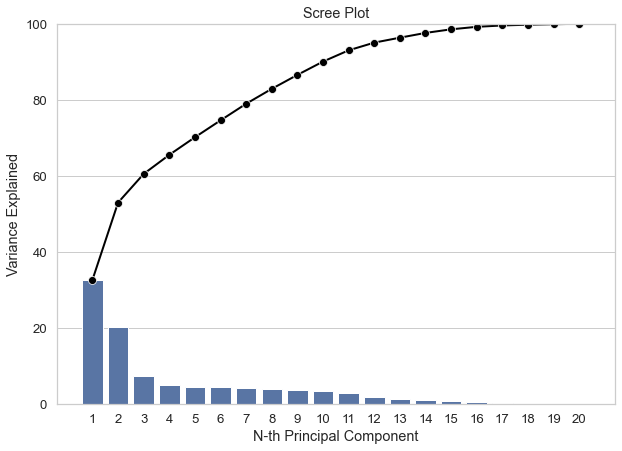

In [98]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

Se conserva la variación total que con los datos escalados, sin embargo los datos se distribuyeron de manera diferente.

In [99]:
pcs_df = pd.DataFrame(components, columns = PC_components)
getVarianceInfo(pcs_df)

Total variance 20.00066762359382
Varianza 1: 32.69%, total: 32.69%
Varianza 2: 20.31%, total: 53.0%
Varianza 3: 7.54%, total: 60.55%
Varianza 4: 5.01%, total: 65.56%
Varianza 5: 4.62%, total: 70.17%
Varianza 6: 4.44%, total: 74.62%
Varianza 7: 4.37%, total: 78.98%
Varianza 8: 3.92%, total: 82.9%
Varianza 9: 3.66%, total: 86.57%
Varianza 10: 3.5%, total: 90.07%
Varianza 11: 2.96%, total: 93.02%
Varianza 12: 2.02%, total: 95.05%
Varianza 13: 1.3%, total: 96.35%
Varianza 14: 1.25%, total: 97.6%
Varianza 15: 0.94%, total: 98.54%
Varianza 16: 0.66%, total: 99.2%
Varianza 17: 0.35%, total: 99.55%
Varianza 18: 0.2%, total: 99.76%
Varianza 19: 0.13%, total: 99.88%
Varianza 20: 0.12%, total: 100.0%


¿Cuál es el número de componentes mínimo y por qué?

Se podría considerar como valor mínimo las primeras 10 componentes porque representan el 90% de los datos originales, a diferencia que de acuerdo a la suma acumulada de la varianza en el dataset original serían las primeras 16 variables para llegar al 90%.

¿Cuál es la variación de los datos que representan esos componentes?

¿Cuál es la pérdida de información después de realizar PCA?

En este caso si se desea utilizar un número específico de componentes como es el caso de las primeras 10 se perdería un 10% de información del dataset, sin embargo, al ir considerando mas componentes se puede evitar la perdida de información pero este no sería la mejor opción porque lo que estamos buscando es reducir las variables tratando de perder la menor cantidad de información.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Generar plot

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

In [103]:
pcs.components_.shape

(20, 20)